In [183]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
sns.set_theme(style="whitegrid")

In [185]:
LOGS = [f"../data/prices_round_1_day_{i}.csv" for i in [-2, -1, 0]]

In [186]:
price_dfs = [pd.read_csv(log, sep=';') for log in LOGS]

In [187]:
all_df = pd.concat(price_dfs, ignore_index=True)
all_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
59996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
59997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
59998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [188]:
products = all_df['product'].unique()
product_dfs = {prod: all_df[all_df['product'] == prod] for prod in products}
product_dfs["AMETHYSTS"]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
5,-2,200,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,0.0
6,-2,300,AMETHYSTS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,0.0
8,-2,400,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59991,0,999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
59993,0,999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
59994,0,999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
59997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0


In [189]:
time_series_by_product = {prod: df.reset_index(inplace=False)["mid_price"] for prod, df in product_dfs.items()}

<Axes: >

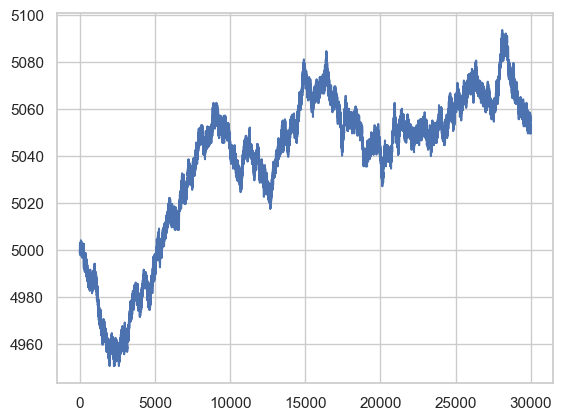

In [190]:
time_series_by_product["STARFRUIT"].plot(y="mid_price")

<Axes: xlabel='index', ylabel='mid_price'>

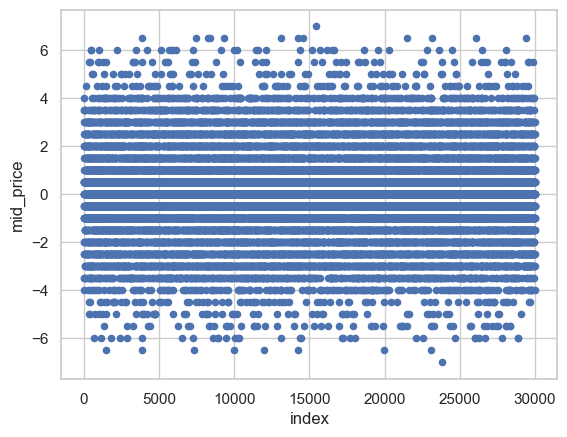

In [222]:
time_series_by_product["STARFRUIT"].diff().reset_index().plot.scatter(x="index", y="mid_price")

<Axes: >

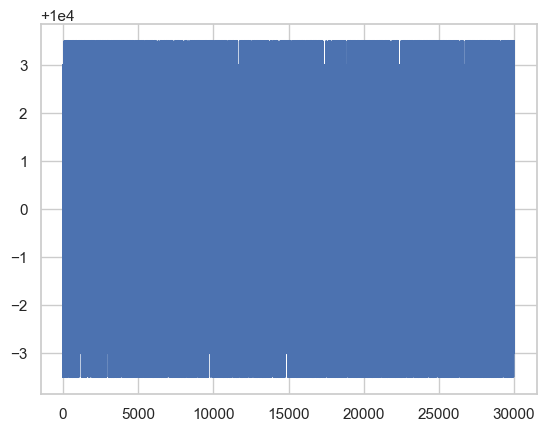

In [191]:
time_series_by_product["AMETHYSTS"].plot(y="mid_price")

## Hypotheses
- Starfruit mid_price is some kind of Brownian motion with some number of derivatives (+ noise)
- Amethysts mid_prices are independent

### Plot ACF/PACF

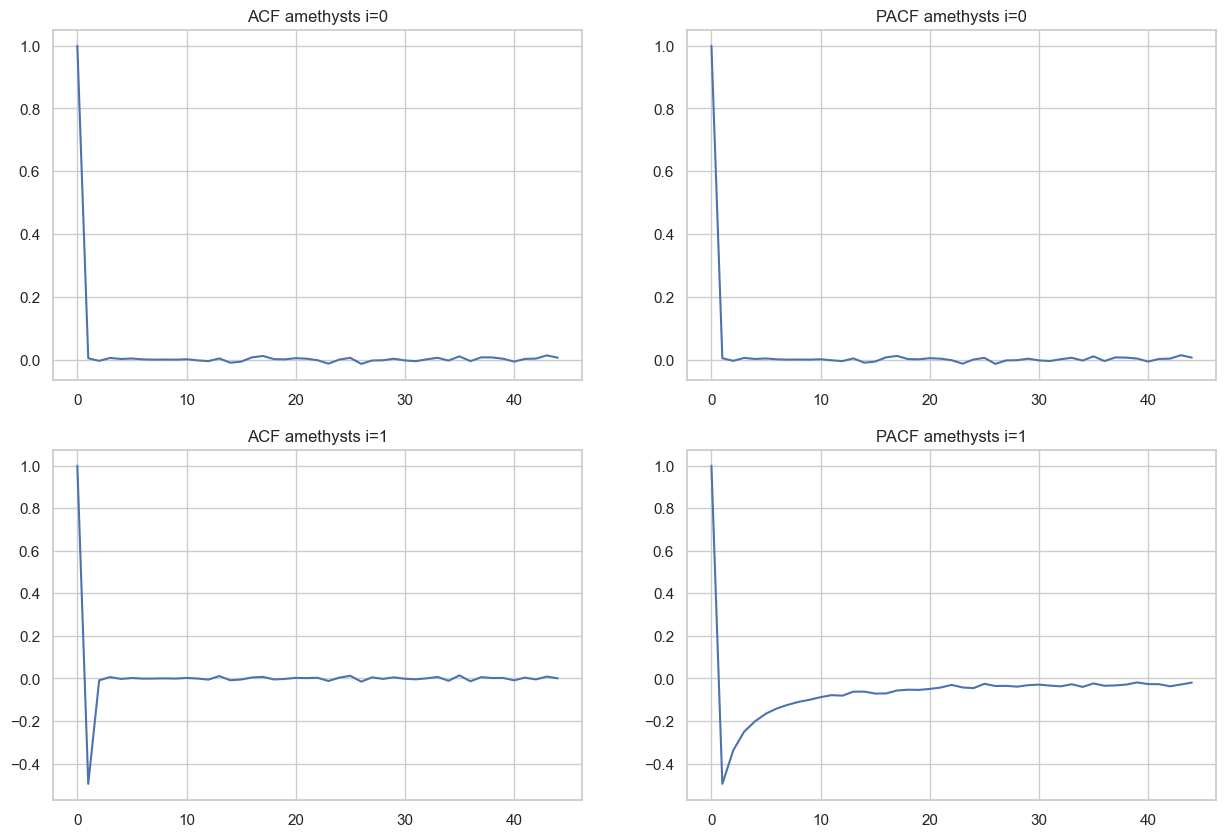

In [192]:
def plot_for_product(series, name, num_i, *args, **kwargs):
    fig, axs = plt.subplots(num_i, 2, figsize=(15, 5 * num_i))
    # series = time_series_by_product[prod]
    for i in range(num_i):
        acf_vals = acf(series, *args, **kwargs)
        pacf_vals = pacf(series, *args, **kwargs)
        axs[i, 0].plot(acf_vals)
        axs[i, 0].set_title(f"ACF {name} i={i}")
        axs[i, 1].plot(pacf_vals)
        axs[i, 1].set_title(f"PACF {name} i={i}")
        series = series.diff().dropna()

plot_for_product(time_series_by_product["AMETHYSTS"], "amethysts", 2)

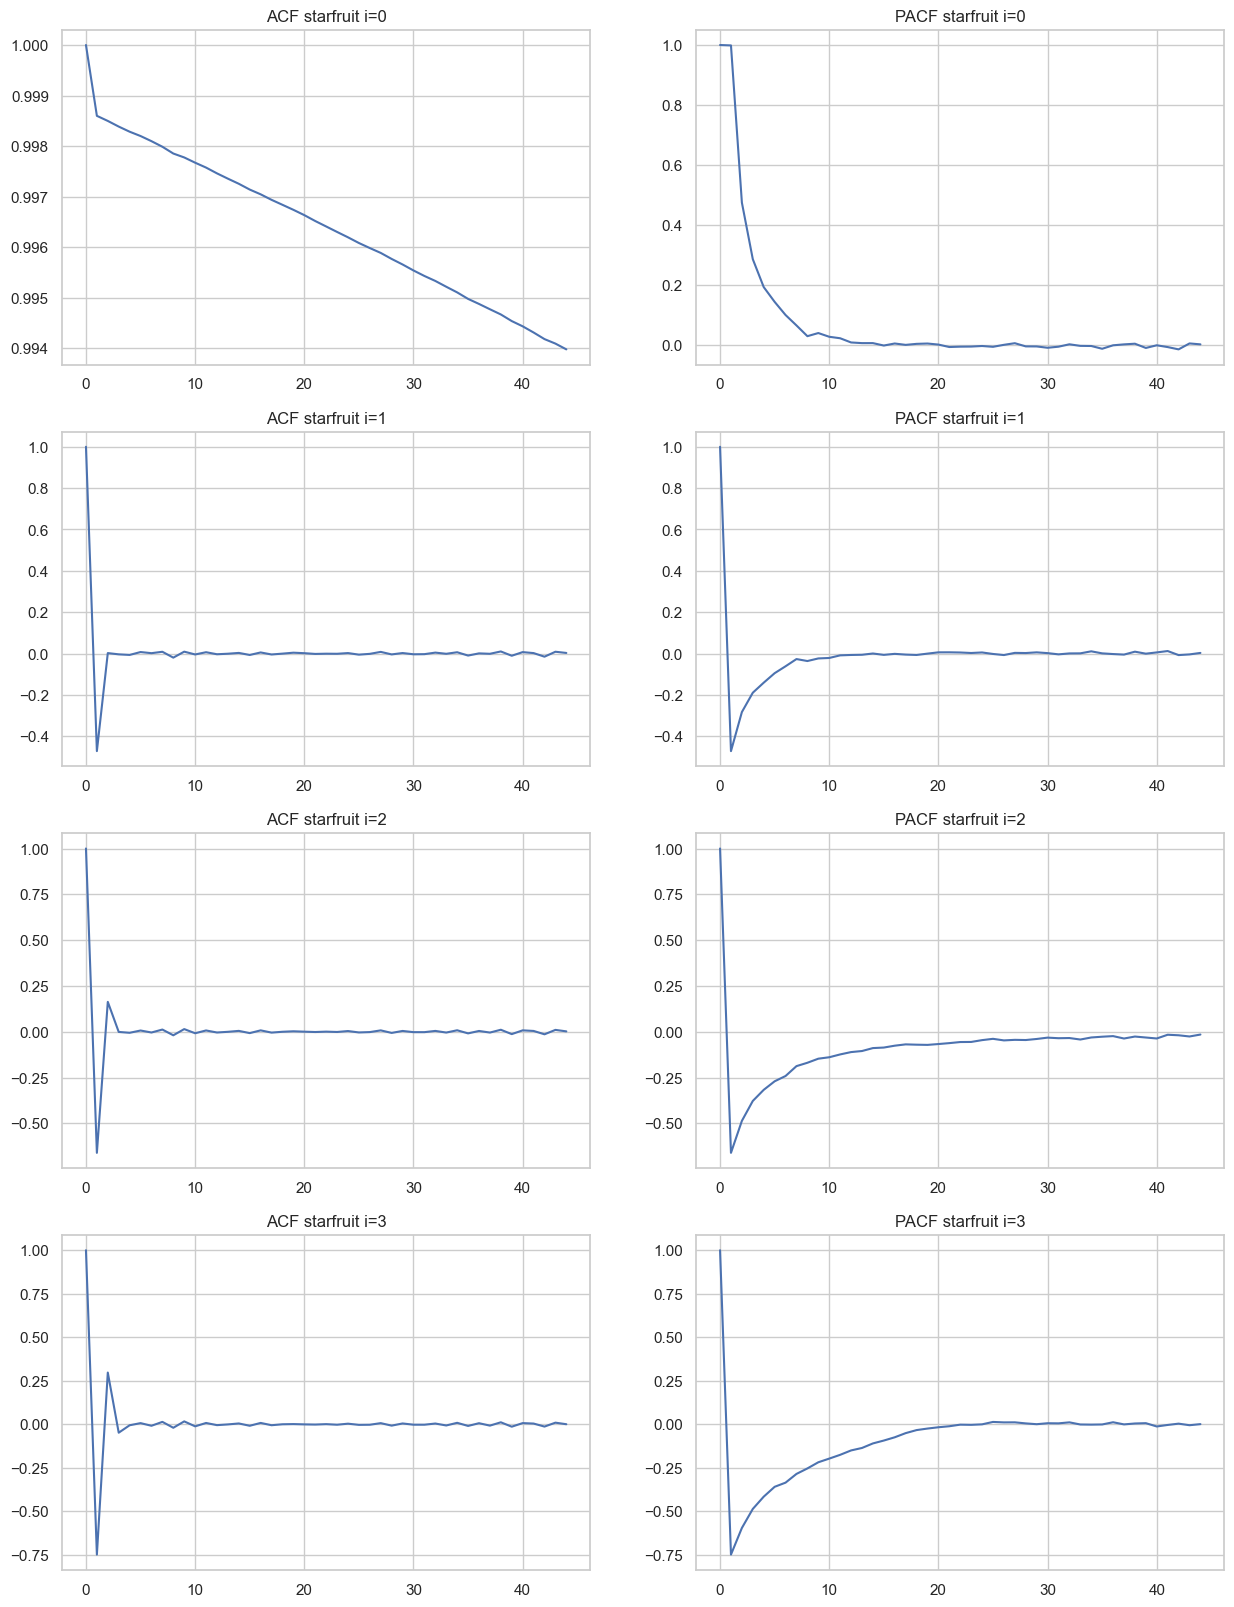

In [193]:
plot_for_product(time_series_by_product["STARFRUIT"], "starfruit", 4)

## Observations

- Amethyst price seems to be totally independent
- Starfruit price seems to follow ARIMA(0, 1, 1) (by https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method#Autocorrelation_and_partial_autocorrelation_plots)

ARIMA(0, 1, 1) is

\begin{align*}
    \delta_t = \varepsilon_t + \theta_1\varepsilon_{t-1}
\end{align*}

where $\delta_t = X_t - X_{t-1}$ are the successive differences, and $\varepsilon_t$ are i.i.d. with zero mean (and also normal, but this probably isn't true in our case).

https://people.duke.edu/~rnau/411arim.htm -> "simple exponential smoothing"

### Regress for coefficients

In [224]:
mod = ARIMA(time_series_by_product["STARFRUIT"], order=(0, 1, 1))
res = mod.fit()

In [225]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              mid_price   No. Observations:                30000
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -52302.238
Date:                Tue, 09 Apr 2024   AIC                         104608.477
Time:                        20:38:58   BIC                         104625.094
Sample:                             0   HQIC                        104613.809
                              - 30000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7086      0.004   -176.818      0.000      -0.716      -0.701
sigma2         1.9137      0.013    146.455      0.000       1.888       1.939
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               929.04
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.03
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

^ thats a lot of info! (idk what it says lmao)

(5020.0, 5060.0)

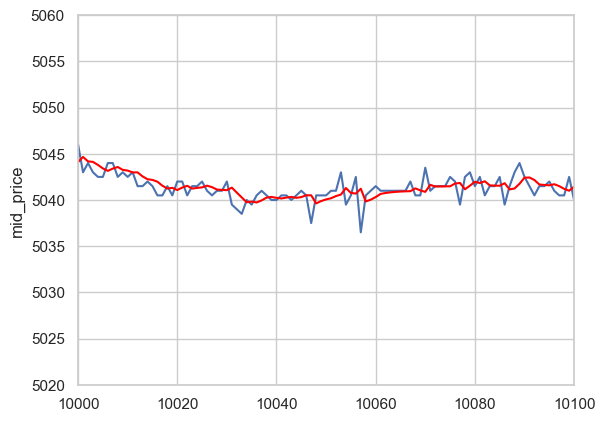

In [226]:
sns.lineplot(time_series_by_product["STARFRUIT"])
sns.lineplot(res.fittedvalues.drop(0), color='red')
plt.xlim(10000, 10100)
plt.ylim(5020, 5060)

In [227]:
res.test_normality(method="jarquebera")

array([[9.29040462e+002, 1.82568952e-202, 3.42903318e-002,
        3.85939155e+000]])

## Extract coefficients

In [228]:
THETA_1 = res.polynomial_ma[1]
SIGMA2 = res.resid.drop(0).var()
print(THETA_1, SIGMA2)

-0.7085722299954903 1.913776900743862


In [229]:
class ARIMA011Infer:
    def __init__(self, theta_1, sigma2):
        self.theta_1 = theta_1
        self.sigma2 = sigma2
        self.x = []
        self.delta = [None]
        self.epsilon = []

    def get_delta(self, t):
        if t <= 0:
            return 0
        return self.delta[t]
    
    def get_epsilon(self, t):
        if t < 0:
            return 0
        return self.epsilon[t]

    def predict_next(self):
        t = len(self.x)
        if t == 0:
            return None
        return self.x[t-1] + self.theta_1 * self.get_epsilon(t-1)

    def observe(self, x):
        t = len(self.x)
        if t == 0:
            self.x.append(x)
            self.epsilon.append(0)
            return
        prediction = self.predict_next()
        epsilon = x - prediction
        self.epsilon.append(epsilon)
        self.x.append(x)
        if len(self.x) >= 2:
            self.delta.append(self.x[-1] - self.x[-2])

5051.348683009961


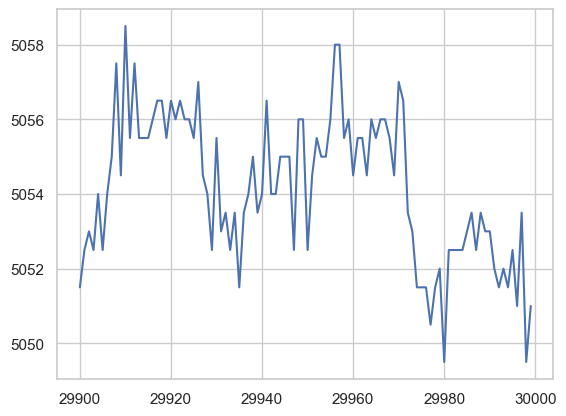

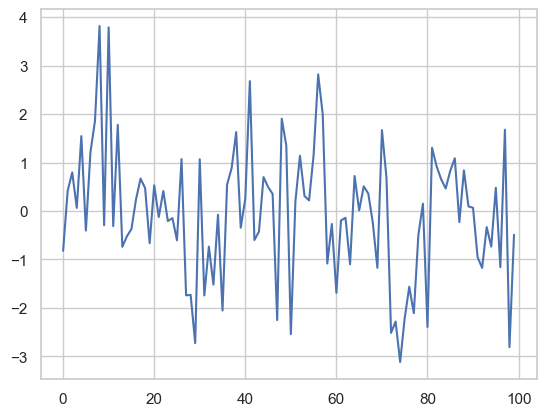

-0.033436172637975686


In [230]:
test_series = time_series_by_product["STARFRUIT"].head(30200)

infer = ARIMA011Infer(THETA_1, SIGMA2)
for x in test_series:
    infer.observe(x)

print(infer.predict_next())

test_series.tail(100).plot()
plt.show()
pd.Series(infer.epsilon[-100:]).plot()
plt.show()
print(pd.Series(infer.epsilon[-100:]).mean())

<Axes: ylabel='mid_price'>

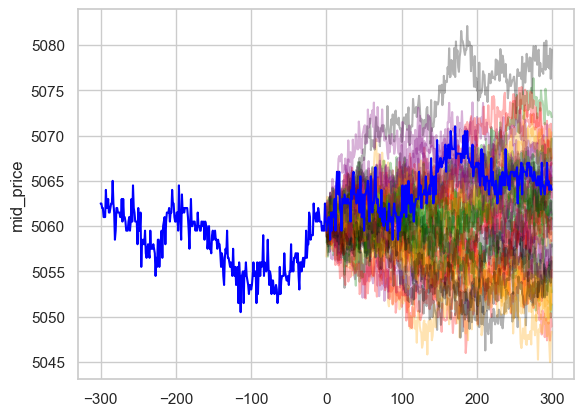

In [325]:
START = 24950
blind_series = []
for i in range(40):
    infer = ARIMA011Infer(THETA_1, SIGMA2)
    # infer.observe(5000)
    for x in time_series_by_product["STARFRUIT"].head(START):
        infer.observe(x)
    generated = []
    for t in range(300):
        next = infer.predict_next() + np.random.normal(0, np.sqrt(SIGMA2))
        generated.append(next)
        infer.observe(next)
    blind_series.append(pd.Series(generated))
    sns.lineplot(pd.Series(generated), alpha=0.3, color=["red", "orange", "green", "purple", "black"][i % 5])

plt.plot(np.arange(-300, 0), time_series_by_product["STARFRUIT"][START-300:START].reset_index(drop=True), color="blue")
sns.lineplot(time_series_by_product["STARFRUIT"][START:START+300].reset_index(drop=True), color="blue")

6


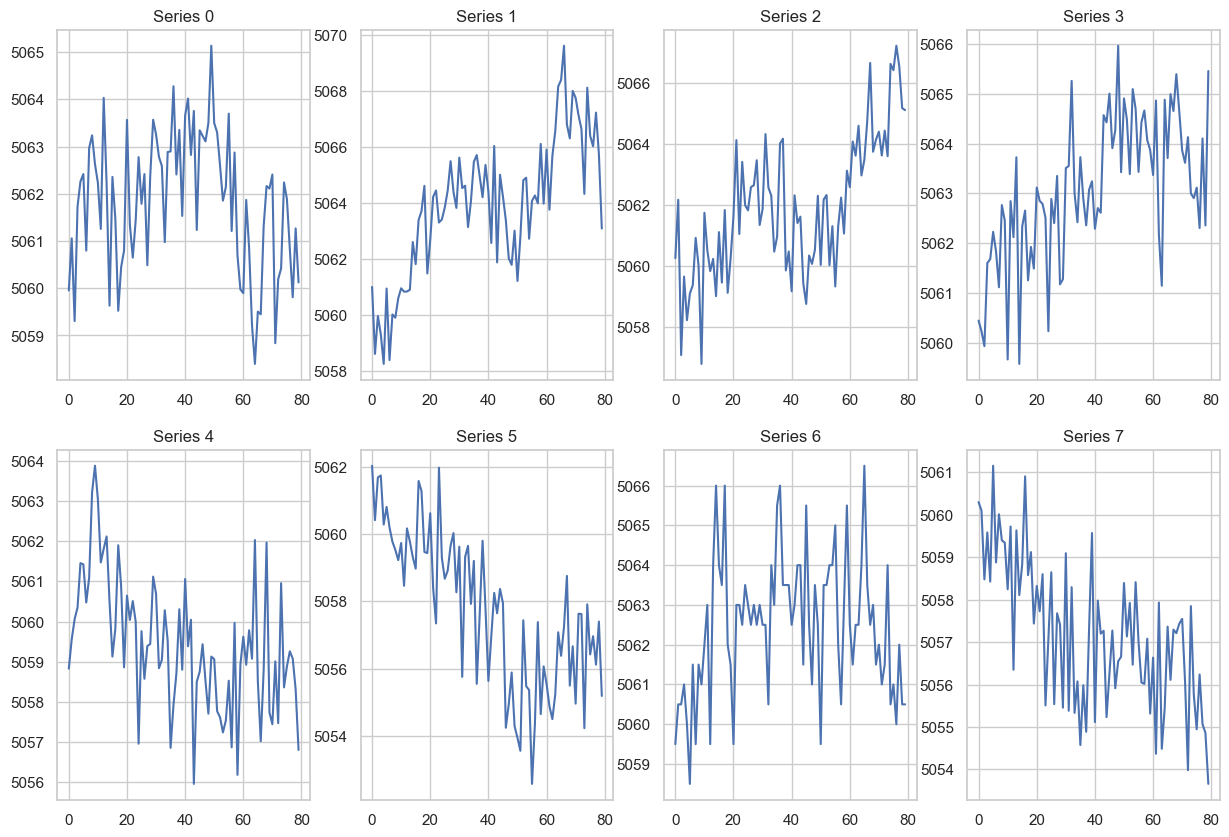

In [331]:
random_idx = 6
# blind_series.insert(random_idx, time_series_by_product["STARFRUIT"])
all_series = blind_series[:random_idx] + [time_series_by_product["STARFRUIT"][START:START+300].reset_index(drop=True).rename_axis(index=None)] + blind_series[random_idx:]

print(random_idx)

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
for i, series in enumerate(all_series):
    if i >= 8: break
    sns.lineplot(series[:80], ax=axs[i // 4, i % 4])
    axs[i // 4, i % 4].set_title(f"Series {i}")
    axs[i // 4, i % 4].set_ylabel("")